In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shutil import copyfile

In [71]:
%run -i './blextract/blaseball_archive.py'
copyfile('./full_player_data.csv', './season3/data-3-24.csv')


namon': 0.11834834664797733, 'fate': 57}, {'team_name': 'Jazz Hands', 'team_role': 'lineup', 'id': 'e6114fd4-a11d-4f6c-b823-65691bb2d288', '_id': 'e6114fd4-a11d-4f6c-b823-65691bb2d288', 'anticapitalism': 0.05241981610960256, 'baseThirst': 0.747302459430808, 'buoyancy': 0.8454237902663244, 'chasiness': 0.21628221127839709, 'coldness': 0.41218048205218505, 'continuation': 0.580453346887359, 'divinity': 0.2073036086911315, 'groundFriction': 0.6532658026730973, 'indulgence': 0.4059060012470399, 'laserlikeness': 0.6464067410422376, 'martyrdom': 0.7539134260475908, 'moxie': 0.6035162875353599, 'musclitude': 0.10073193458098362, 'name': 'Bevan Underbuck', 'bat': '', 'omniscience': 0.4304198138541122, 'overpowerment': 0.3315718479593899, 'patheticism': 0.018036503472701915, 'ruthlessness': 0.1358758358648009, 'shakespearianism': 0.9161812634123179, 'suppression': 0.40814206781896356, 'tenaciousness': 0.807156504260699, 'thwackability': 0.10260746918447095, 'tragicness': 0.1, 'unthwackability':

'./season3/data-3-24.csv'

In [67]:
playerstats = pd.read_csv('./season3/data-3-24.csv')

In [62]:
playerstats[playerstats['name'] == 'Marco Stink'].transpose().to_csv('ms1.csv')

In [65]:
playerstats = pd.read_csv('./season3/data-3-22.csv')
playerstats[playerstats['name'] == 'Marco Stink'].transpose().to_csv('ms2.csv')

In [68]:
sum(playerstats['peanutAllergy'])

338

In [5]:
infostats = ['team_name', 'team_role', 'id', '_id', 'name', 'deceased', 'bat']

In [6]:
numerics = playerstats.drop(infostats, axis=1)
melted = numerics.melt()

In [7]:
playerstats.groupby('team_name').sum()['peanutAllergy'].sort_values()

team_name
Garages          11
Crabs            13
Wild Wings       14
Shoe Thieves     14
Flowers          14
Tigers           14
Steaks           15
Moist Talkers    16
Millennials      16
Lovers           16
Breath Mints     17
Jazz Hands       17
Pies             18
Tacos            18
Sunbeams         19
Dalé             20
Fridays          21
Firefighters     21
Magic            21
Spies            23
Name: peanutAllergy, dtype: int64

In [24]:
playerstats[playerstats['tragicness']>.1][['name', 'team_name', 'tragicness']]

,name,team_name,tragicness
13,Sandford Garner,Lovers,0.785569
150,Hotbox Sato,Flowers,0.292625
275,Eduardo Woodman,Pies,0.557278
458,Tiana Cash,Garages,0.916773


In [25]:
playerstats[playerstats['name'] == 'Sosa Hayes']['patheticism']

328    0.99
Name: patheticism, dtype: float64

In [26]:
playerstats[playerstats['name'] == 'Nolanestophia Patterson' ].to_csv('nolanpat.csv')

In [27]:
nutsetc = playerstats[['team_name', 'name', 'peanutAllergy', 'cinnamon', 'fate', 'bat']]
nutsetc.to_csv('nutsandsuchpt2.csv')

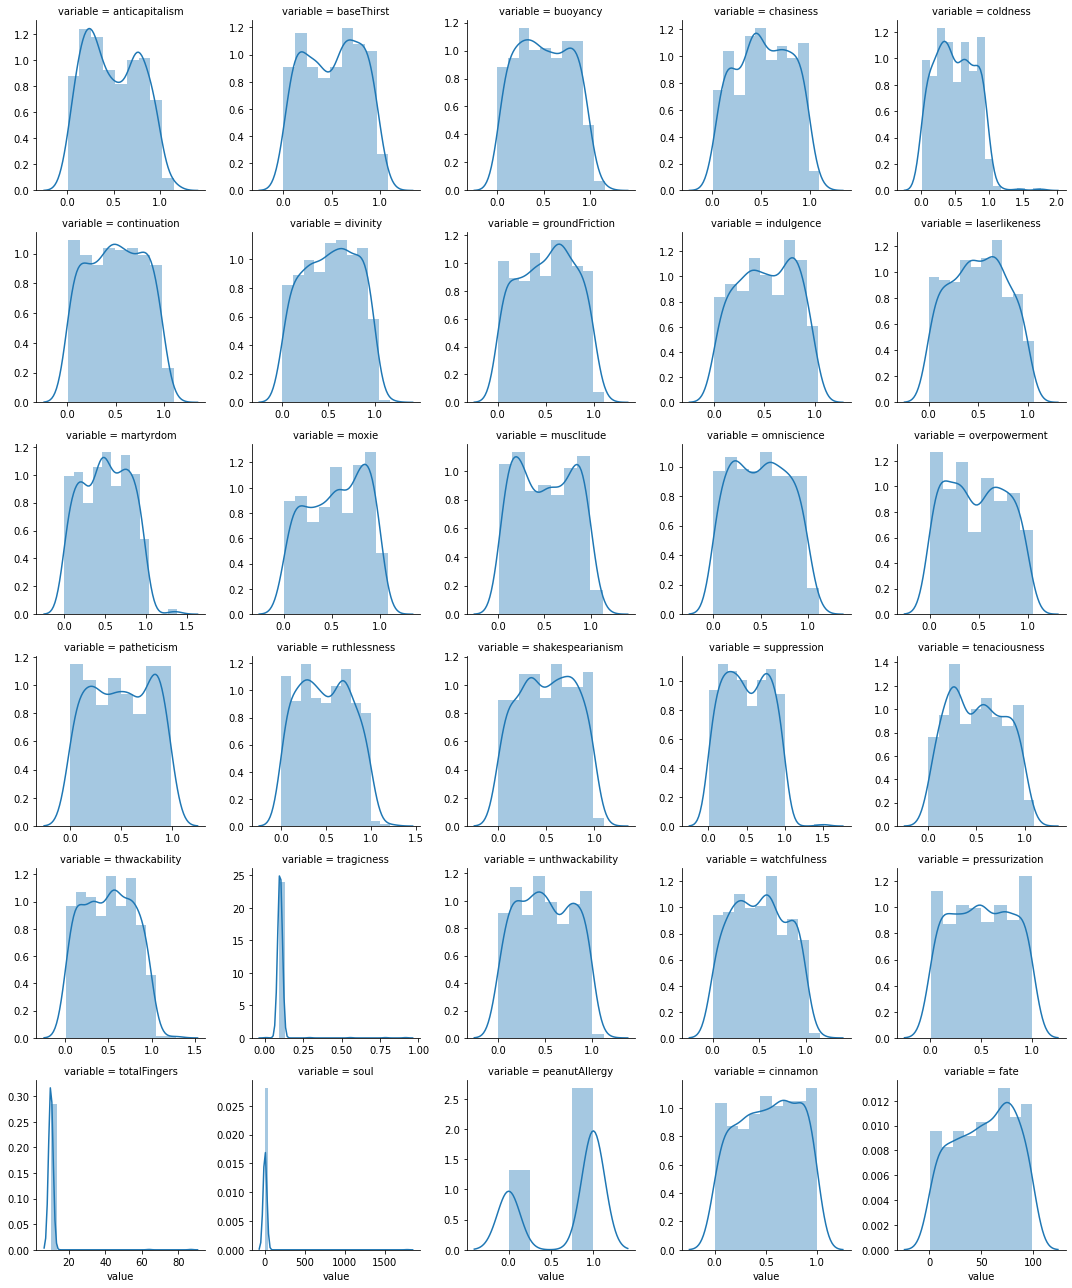

In [29]:
g = sns.FacetGrid(melted, col='variable', col_wrap=5, sharey=False, sharex=False)
g.map(sns.distplot, 'value')
plt.savefig('dists35.png', facecolor='white', dpi=500)

In [20]:
imap = Isomap(n_components=10)
imapscore = imap.fit_transform(numerics)

NameError: name 'Isomap' is not defined

In [32]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numerics)
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10)
kmeans.fit(reduced_data)

h = 0.02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the playerstats dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

NameError: name 'KMeans' is not defined

In [10]:
plt.figure()
sns.pairplot(data=numerics, x_vars=numerics.columns, y_vars=numerics.columns)

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.savefig('monster.png')

In [17]:
obp = pd.DataFrame({'name': ['Jacomb Haynes', 'Jessi Wise', 'Workman Gloom', 'Jessica Telephone', 'Fish Summer'], 'OBP': [0.480, 0.466, 0.442, 0.435, 0.433]})
sos = pd.DataFrame({'name': ['']})

In [18]:
onbaseleaders = playerstats[playerstats['name'].isin(obp.name)]

In [19]:
playerstats['onbaseleader'] = playerstats['name'].isin(obp.name)

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [23]:
predictor = DecisionTreeClassifier(criterion='gini')
numerics = playerstats.drop(infostats, axis=1)
x = numerics.drop('onbaseleader', axis=1)
y = numerics.onbaseleader
predictor.fit(x, y)
pred_y = predictor.predict_proba(x)
print(predictor.score(x, y))

1.0


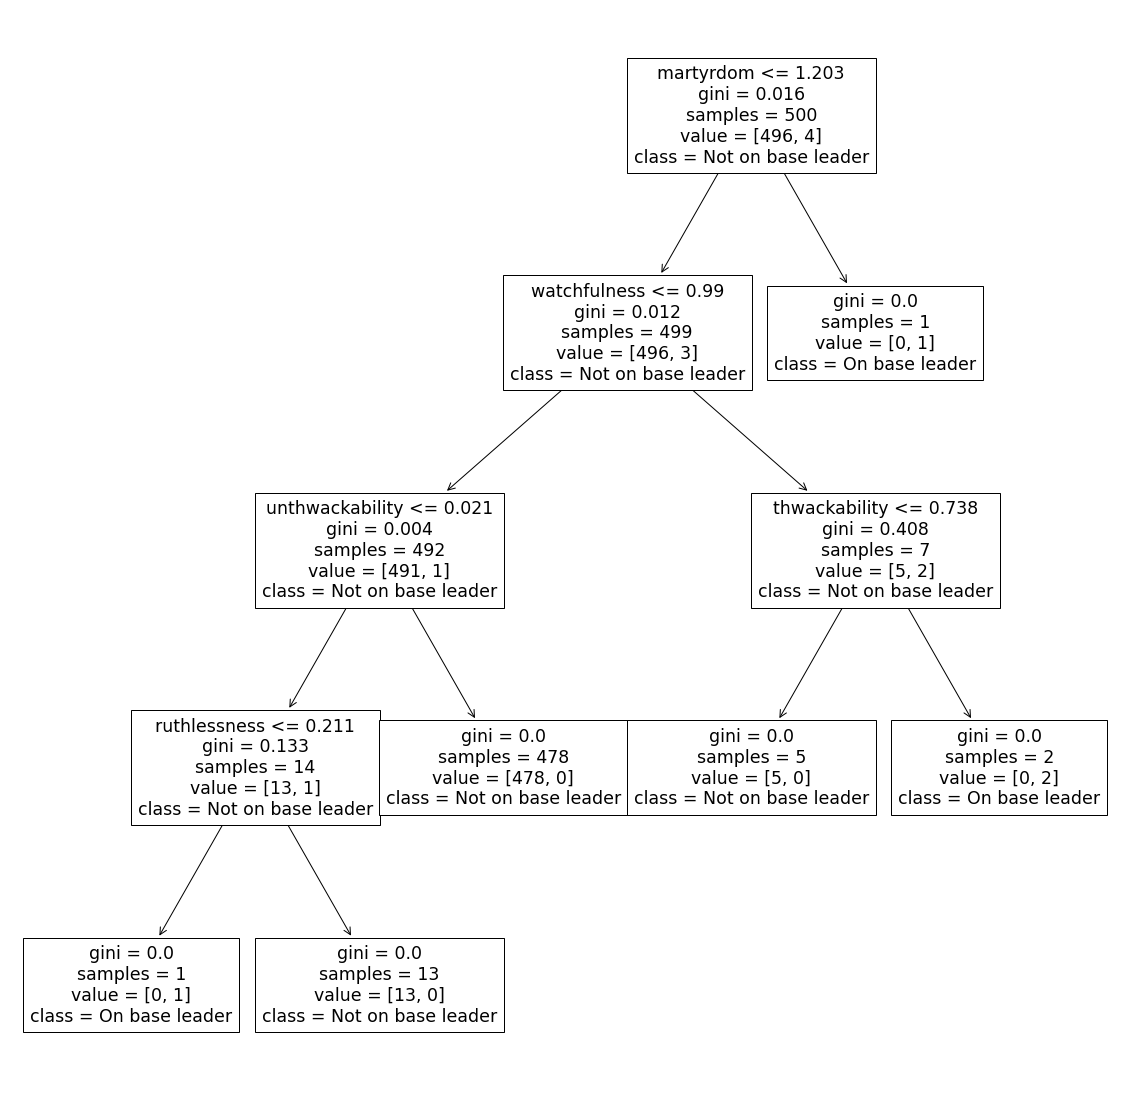

In [26]:
plt.figure(figsize=(20, 20))
plot_tree(predictor, feature_names=numerics.columns, class_names=['Not on base leader', 'On base leader']);
plt.savefig('onbase.png')

<AxesSubplot:xlabel='tenaciousness', ylabel='name'>

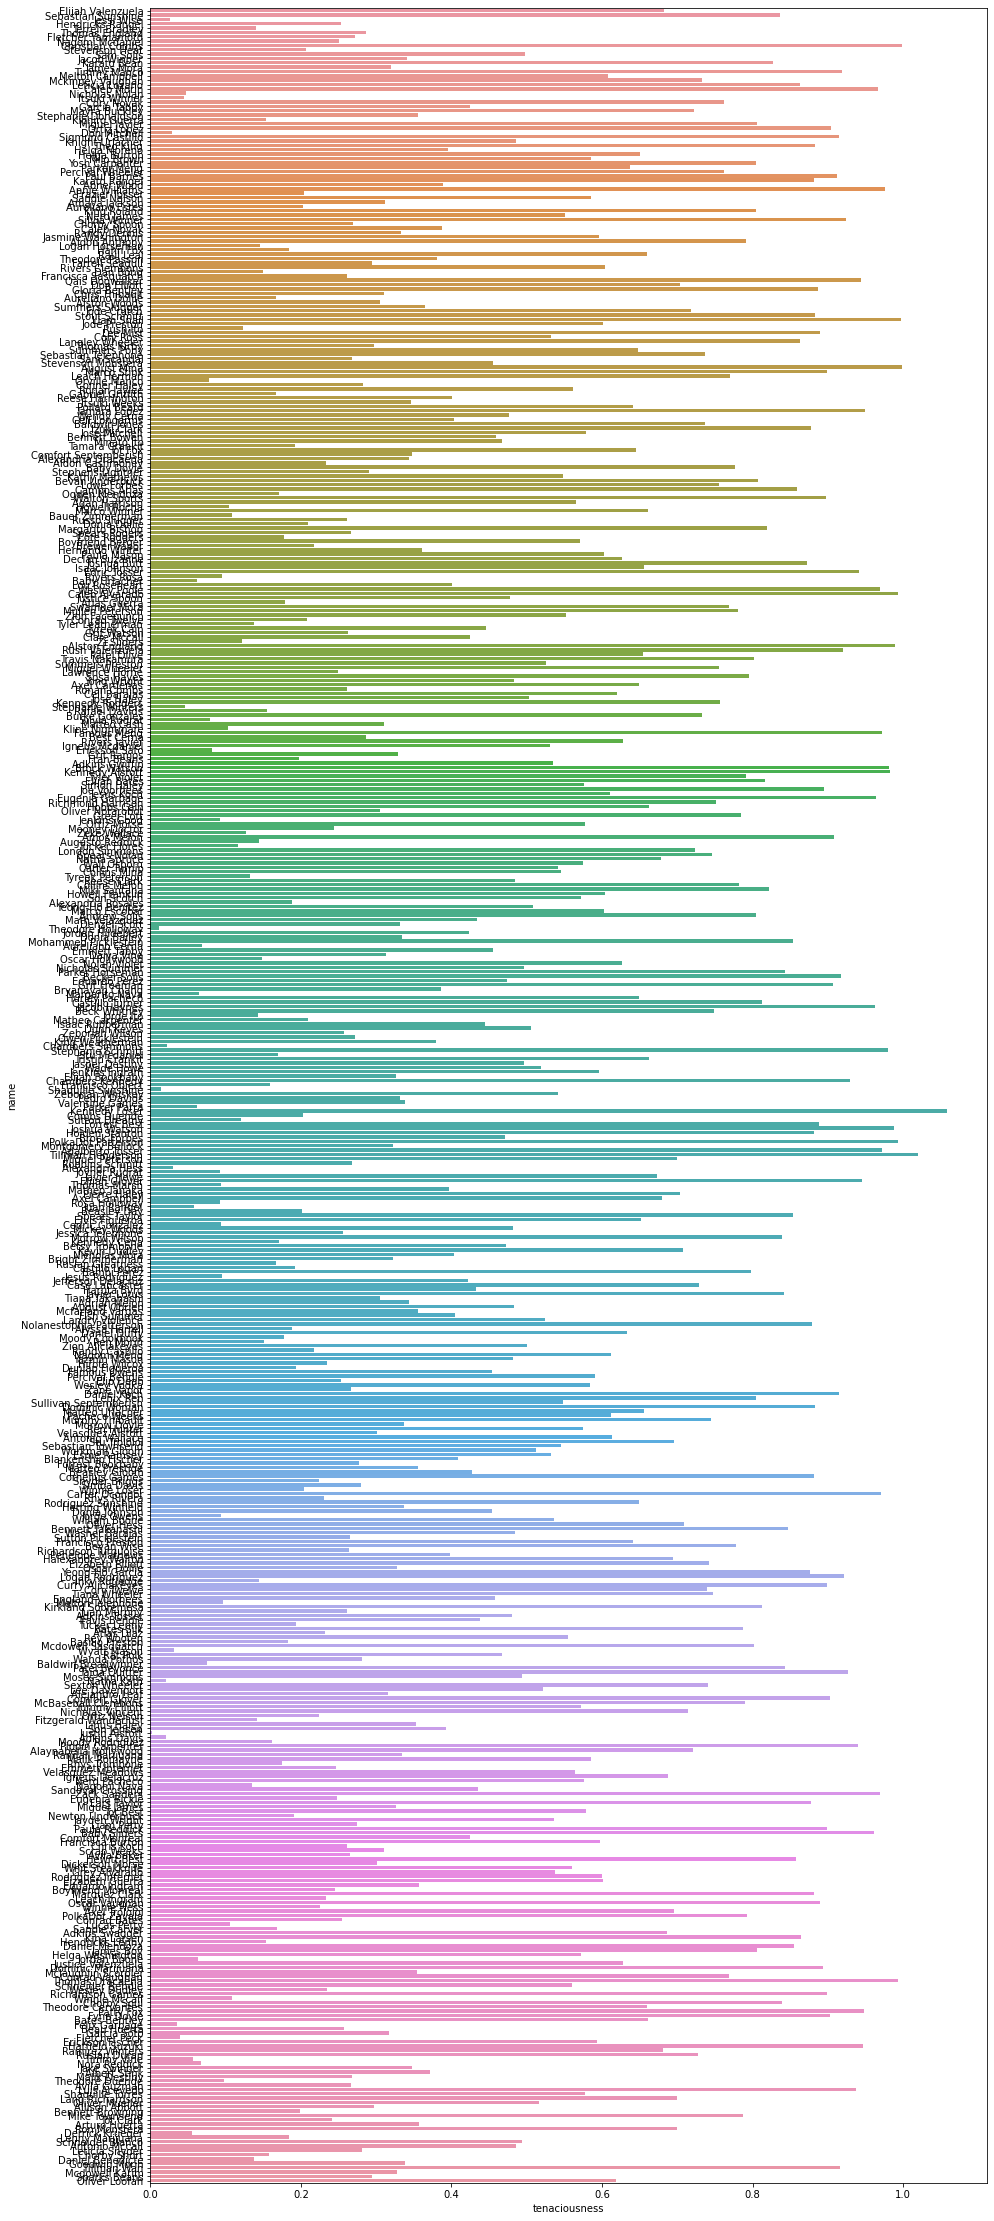

In [49]:
plt.figure(figsize=(15, 40))
tenacdf = pd.DataFrame(playerstats.tenaciousness, playerstats.name)
sns.barplot(tenacdf)

In [53]:
playerstats[playerstats['onbaseleader'] == True]

,team_name,team_role,id,_id,anticapitalism,baseThirst,buoyancy,chasiness,coldness,continuation,...,tenaciousness,thwackability,tragicness,unthwackability,watchfulness,pressurization,totalFingers,soul,deceased,onbaseleader
2,Fridays,lineup,57448b62-f952-40e2-820c-48d8afe0f64d,57448b62-f952-40e2-820c-48d8afe0f64d,0.522719,0.207211,0.704722,0.455331,0.204079,0.445864,...,0.026225,0.780398,0.0,0.937916,0.999646,0.529025,10,6,False,True
281,Pies,lineup,083d09d4-7ed3-4100-b021-8fbe30dd43e8,083d09d4-7ed3-4100-b021-8fbe30dd43e8,0.581559,0.893708,0.729039,0.492176,0.364249,0.785123,...,0.255718,0.923282,0.0,0.210183,0.466907,0.192405,10,7,False,True
300,Tigers,lineup,d89da2d2-674c-4b85-8959-a4bd406f760a,d89da2d2-674c-4b85-8959-a4bd406f760a,0.734706,0.501981,0.885057,0.210872,0.637204,0.770360,...,0.404990,0.702259,0.0,0.018686,0.175023,0.760998,10,6,False,True
331,Shoe Thieves,lineup,bd4c6837-eeaa-4675-ae48-061efa0fd11a,bd4c6837-eeaa-4675-ae48-061efa0fd11a,0.700498,0.090777,0.347201,0.096236,0.408045,0.594494,...,0.512810,0.789426,0.0,0.089973,0.990820,0.294383,10,6,False,True


In [4]:
import importlib
import ticker
importlib.reload(ticker);

In [5]:
from modernblaseball.modern_blaseball import blaseball_api
blaseball = blaseball_api()
result = blaseball.get_global_events()
tickerjson = result.json()

KeyboardInterrupt: 

In [17]:
ticker.ticker_to_pd(tickerjson[6]['msg'])

([], [])

In [16]:
tickerjson[6]['msg']

'In Memoriam: Jaylen Hotdogfingers, Fitzgerald Massey, Tyreek Olive, Jenna Maldonado, Nora Perez, Scrap Murphy, Lars Mendoza, Dickerson Greatness, Famous Oconnor, Sosa Elftower, Zi Delacruz, Trevino Merritt, Jessi Wise, Hurley Pacheco, Alexandria Dracaena, Aldon Anthony'

In [72]:
bavg = pd.DataFrame({'name': ticker.ticker_to_pd(tickerjson[3]['msg'])[0], 'BAVG': ticker.ticker_to_pd(tickerjson[3]['msg'])[0]})
sos = pd.DataFrame({'name': ticker.ticker_to_pd(tickerjson[4]['msg'])[0], 'SOS': ticker.ticker_to_pd(tickerjson[4]['msg'])[0]})

In [73]:
playerstats['battingleader'] = playerstats['name'].isin(bavg.name)
playerstats['strikeoutleader'] = playerstats['name'].isin(sos.name)

In [89]:
basesteal = pd.DataFrame({'name': ticker.ticker_to_pd(tickerjson[3]['msg'])[0], 'basesteal': ticker.ticker_to_pd(tickerjson[3]['msg'])[0]})
playerstats['basesteal'] = playerstats['name'].isin(basesteal.name)

In [1]:
predictor = DecisionTreeClassifier(criterion='gini', min_impurity_split=0.01)
numerics = playerstats.drop(infostats, axis=1)
x = numerics.drop('basesteal', axis=1)
y = numerics.basesteal
predictor.fit(x, y)
pred_y = predictor.predict_proba(x)
print(predictor.score(x, y))
plt.figure(figsize=(10, 10))
plot_tree(predictor, feature_names=numerics.columns, class_names=['Base stealing leader', 'Not base stealing leader']);
plt.savefig('stealtree.png', transparent=False)

NameError: name 'DecisionTreeClassifier' is not defined

1.0


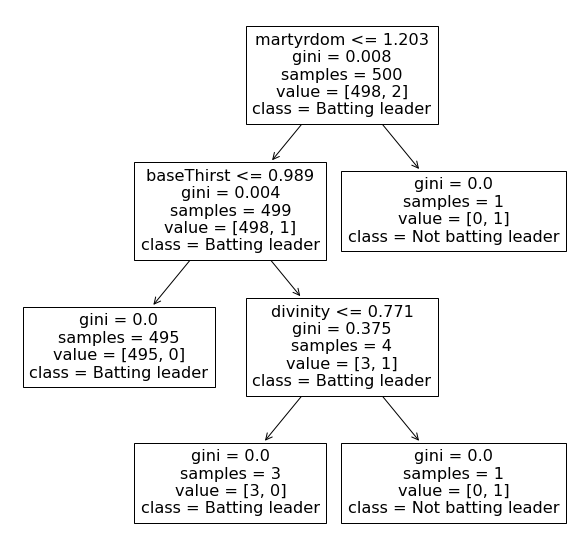

In [77]:
predictor = DecisionTreeClassifier(criterion='gini')
numerics = playerstats.drop(infostats, axis=1)
x = numerics.drop('battingleader', axis=1)
y = numerics.battingleader
predictor.fit(x, y)
pred_y = predictor.predict_proba(x)
print(predictor.score(x, y))
plt.figure(figsize=(10, 10))
plot_tree(predictor, feature_names=numerics.columns, class_names=['Batting leader', 'Not batting leader']);
plt.savefig('battingtree.png')

1.0


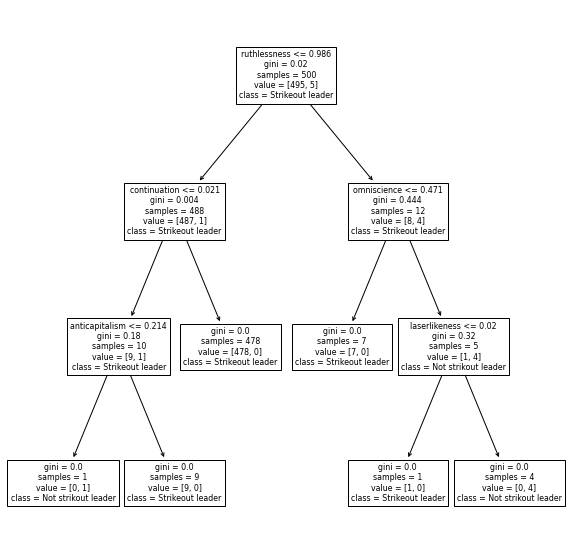

In [83]:
predictor = DecisionTreeClassifier(criterion='gini')
numerics = playerstats.drop(infostats, axis=1)
x = numerics.drop('strikeoutleader', axis=1)
y = numerics.strikeoutleader
predictor.fit(x, y)
pred_y = predictor.predict_proba(x)
print(predictor.score(x, y))
plt.figure(figsize=(10, 10))
plot_tree(predictor, feature_names=numerics.columns, class_names=['Strikeout leader', 'Not strikout leader']);
plt.savefig('strikeouttree.png')

In [5]:
incinerated = '["Jaylen Hotdogfingers", "Fitzgerald Massey", "Tyreek Olive", "Jenna Maldonado", "Nora Perez", "Scrap Murphy", "Lars Mendoza", "Dickerson Greatness", "Famous Oconnor", "Sosa Elftower", "Zi Delacruz", "Trevino Merritt", "Jessi Wise", "Hurley Pacheco", "Alexandria Dracaena", "Aldon Anthony", "Rhys Trombone"]'
import json
incinerated = json.loads(incinerated)

1.0


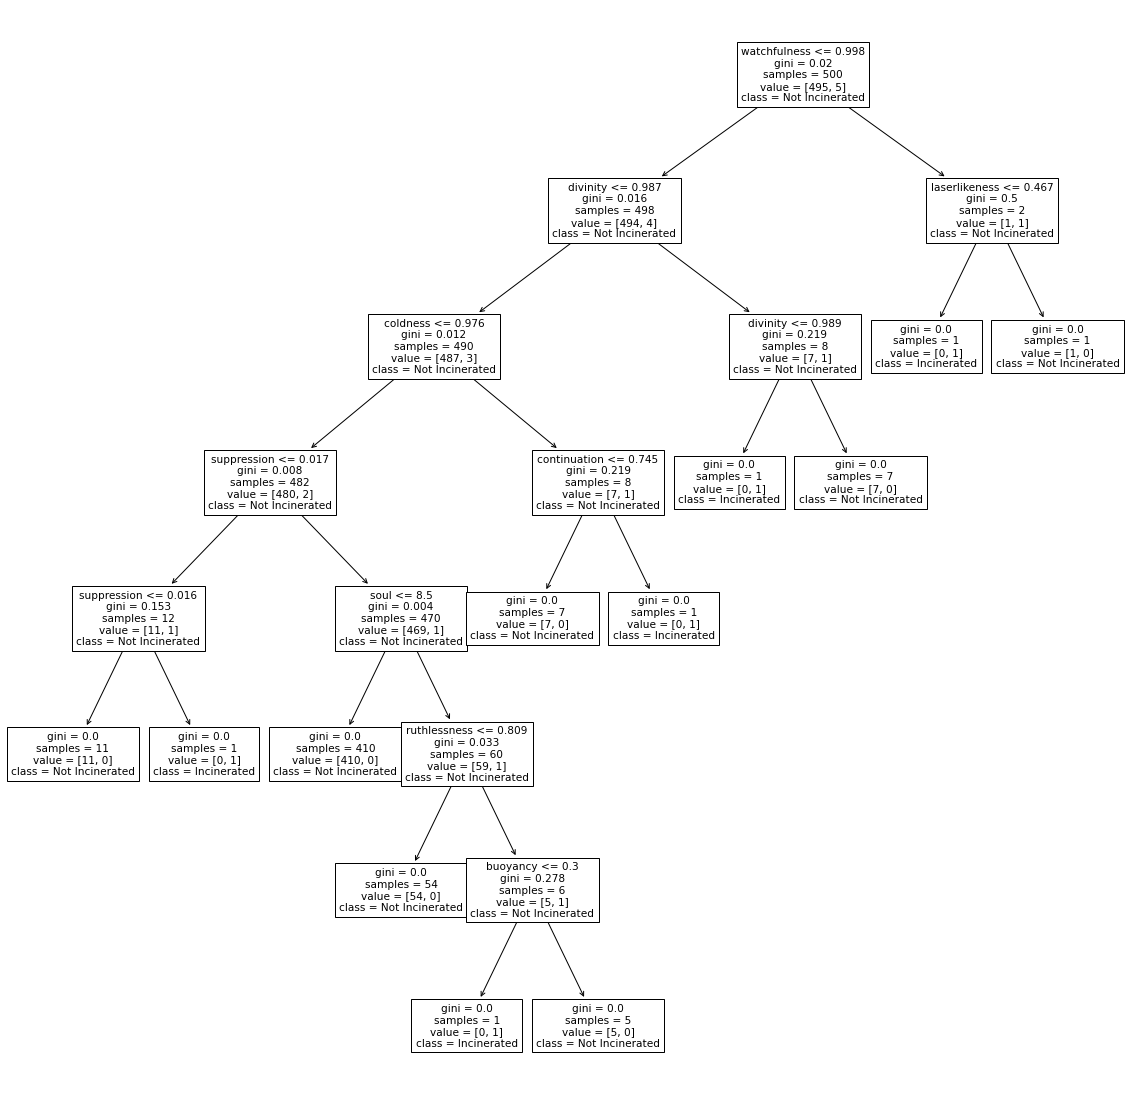

In [13]:
predictor = DecisionTreeClassifier(criterion='gini', min_impurity_split=0.001)
numerics = playerstats.drop(infostats, axis=1)
x = numerics
y = playerstats['name'].isin(incinerated)
predictor.fit(x, y)
pred_y = predictor.predict_proba(x)
print(predictor.score(x, y))
plt.figure(figsize=(20, 20))
plot_tree(predictor, feature_names=numerics.columns, class_names=['Not Incinerated', 'Incinerated']);
plt.savefig('incineratedtree.png')

In [20]:
predictor = LogisticRegressionCV()
numerics = playerstats.drop(infostats, axis=1)
x = numerics['divinity']
y = playerstats['name'].isin(incinerated)
predictor.fit(x, y)
pred_y = predictor.predict_proba(x)
print(predictor.score(x, y))

ValueError: Expected 2D array, got 1D array instead:
array=[7.66916340e-02 4.68087295e-01 1.88209813e-01 9.09114028e-01
 7.26160809e-01 5.60247229e-01 1.60164208e-01 8.57411098e-01
 6.65017303e-02 6.92693557e-01 5.89790064e-01 7.37521444e-01
 3.08139084e-01 3.67820525e-01 1.47014373e-01 5.82600324e-01
 8.88437173e-01 1.14335834e-01 8.66935160e-01 9.33080060e-01
 9.03936006e-01 4.21760901e-01 3.68630937e-01 9.08764925e-01
 1.77612261e-02 1.01480331e-01 8.37502439e-01 4.58723065e-01
 4.66300362e-01 6.80198801e-01 5.63923064e-01 2.05112823e-01
 3.21766808e-01 5.53184082e-01 9.00168524e-01 4.98845467e-01
 5.49214703e-01 5.30981284e-01 9.99182794e-01 1.12394617e-01
 4.28519914e-01 3.83610113e-01 6.44339157e-01 6.46932932e-02
 6.07618077e-01 5.40500076e-01 8.32156057e-01 9.42299214e-01
 7.33971006e-01 9.80695410e-01 2.26416363e-01 6.79956713e-01
 7.51039250e-01 4.60979102e-01 4.36473042e-01 9.61065703e-01
 3.40932769e-01 2.42098692e-01 1.66245590e-01 8.41908099e-02
 5.34921023e-02 1.84700235e-01 8.43114660e-01 6.57386463e-01
 2.84469622e-01 2.53549209e-01 9.91316443e-01 1.28998737e-01
 4.63476802e-01 3.81178904e-01 2.31684474e-01 4.96451596e-01
 8.39097395e-01 4.35494733e-01 4.35514076e-01 8.65859861e-01
 1.06721657e-01 8.31742883e-01 8.66744689e-01 1.68791367e-01
 7.69428898e-01 1.79893716e-01 7.19028412e-01 9.64911565e-01
 9.84634954e-01 3.09447887e-01 9.51800490e-01 8.36677068e-01
 6.84133491e-01 2.94904187e-01 8.20706216e-01 5.89791675e-01
 3.74726739e-01 1.84354561e-01 7.12002806e-01 5.83493748e-01
 1.17732890e-01 2.66928314e-01 3.65649673e-01 5.99593454e-01
 1.60212370e-01 7.76630776e-01 9.77902474e-01 9.88637567e-01
 8.75814768e-01 5.17344755e-01 6.34685097e-01 6.60030737e-01
 2.07303609e-01 3.57272343e-01 5.77106225e-01 4.66186693e-01
 4.39772642e-01 6.61025536e-01 3.55117811e-01 6.15487381e-01
 9.67941758e-01 5.14435039e-01 7.36686978e-01 3.24935297e-02
 7.81106183e-01 3.37914035e-01 3.92092998e-01 4.61756236e-01
 7.20199929e-01 2.35158145e-01 6.75079620e-01 1.62648562e-02
 4.38107568e-01 7.37550879e-03 4.73526159e-01 8.77437453e-01
 9.25592152e-02 3.31230506e-01 2.97054369e-01 4.84655279e-01
 3.44368097e-01 8.44084403e-01 3.45234664e-01 8.44771844e-02
 5.30831003e-01 5.91394515e-01 9.21461303e-01 5.08845707e-01
 5.63161576e-01 5.26032979e-01 7.45475901e-01 6.49946225e-01
 6.29705627e-01 5.73149395e-02 8.05393022e-01 5.67714600e-01
 9.30772423e-01 3.88774383e-01 4.47615556e-01 2.94505001e-01
 4.74475196e-01 8.63485362e-01 5.79595496e-01 7.53277526e-01
 4.43207672e-01 5.68101496e-01 1.91338089e-01 8.11593658e-01
 8.15437059e-01 2.93964661e-01 1.59801315e-01 2.90112691e-01
 2.38466430e-01 4.96439299e-01 6.96795431e-01 2.68183223e-01
 8.62847237e-01 4.53570094e-02 9.70270653e-01 3.83133805e-01
 8.89705577e-01 5.13064838e-01 8.68784786e-01 9.07038566e-01
 3.28873329e-01 5.79144031e-01 6.09518091e-01 1.91681127e-01
 8.06543262e-01 9.29603699e-01 1.27085040e-01 1.20513254e-01
 2.89073675e-01 7.25425646e-01 8.61764658e-01 5.56679052e-01
 8.66377874e-01 5.94138968e-01 6.23365842e-01 6.97182983e-01
 6.64029810e-01 7.40312969e-01 7.01379265e-01 7.36561594e-01
 5.84416364e-01 8.14276696e-01 5.28325165e-01 5.53582115e-01
 6.76924927e-01 5.12318041e-01 5.45948808e-01 3.19877543e-01
 7.98483492e-01 4.68823699e-01 7.77012427e-01 6.15203369e-01
 9.60463097e-01 5.43785838e-01 6.28441613e-01 3.56657818e-01
 2.13863216e-01 6.62186518e-01 5.69028022e-01 7.92339076e-01
 6.15094780e-02 5.18250240e-01 8.89009753e-01 7.86077360e-01
 2.90404131e-01 7.53024440e-01 8.28182849e-01 7.33235460e-01
 3.00175660e-01 6.59337846e-01 8.18687484e-01 9.29453614e-01
 7.63780576e-03 6.57548260e-01 6.41762593e-01 2.07814375e-01
 4.44773258e-01 3.35231632e-01 8.11721082e-01 4.05848923e-01
 7.13968661e-02 6.42220741e-01 3.60916805e-01 4.70166134e-01
 7.02212815e-01 2.43515428e-01 7.78534071e-01 2.83035354e-01
 4.27605215e-01 8.03561241e-01 9.03903121e-01 5.02232572e-01
 9.53835696e-01 8.53893536e-01 7.75858747e-01 4.15015922e-01
 4.89532534e-01 2.97336281e-01 8.15340626e-01 3.54808719e-01
 4.37265868e-01 6.53581384e-02 4.87725159e-01 4.68178231e-01
 4.00454688e-01 5.08486652e-01 6.04353317e-02 9.08297663e-01
 3.29435393e-01 4.96210259e-01 2.53109309e-01 9.32010491e-01
 2.92691593e-01 8.12722287e-01 3.43392723e-01 2.30922864e-01
 6.98800827e-01 3.36376031e-01 2.87219087e-01 7.32277878e-01
 3.11058941e-01 1.02645550e+00 4.23245850e-01 5.51132508e-01
 5.43464490e-01 4.92820312e-01 8.00959547e-01 7.87257045e-01
 6.62775196e-01 6.28982773e-01 1.86562972e-01 1.21650043e-01
 6.43757146e-01 2.45941668e-04 9.17077157e-01 3.86700438e-01
 4.12504556e-02 7.08121882e-01 9.27569415e-01 7.76149865e-01
 8.08850641e-01 9.78559341e-01 7.93473568e-02 2.40079216e-01
 6.06291648e-01 8.49372903e-01 3.34221415e-01 1.11393113e-01
 9.88739515e-01 2.11030668e-01 5.73887521e-01 1.84418219e-03
 3.64387496e-01 7.86098261e-01 2.66590473e-01 5.96747069e-01
 7.19161121e-02 3.92645730e-01 6.28337262e-01 1.54521228e-01
 6.04536445e-01 6.11042979e-02 8.44856225e-01 7.44976106e-01
 5.35688082e-01 4.15910543e-02 9.09256016e-01 3.86163681e-01
 7.77777150e-01 6.62602486e-02 1.86257610e-01 2.84510876e-01
 8.53276634e-01 3.12323661e-02 8.96641591e-01 3.87426668e-02
 7.28034527e-01 7.88747515e-01 6.25698769e-01 1.36077091e-01
 7.84072915e-01 9.09854628e-01 5.37782701e-02 7.37796715e-01
 2.55244820e-02 3.03348188e-01 1.57656602e-01 5.09954497e-01
 4.25027761e-01 1.90313337e-01 4.26925545e-01 1.80542307e-01
 9.77755252e-01 3.83959521e-01 2.02336922e-01 2.42660835e-02
 4.81765101e-01 3.31704149e-01 9.16421773e-01 1.03913821e-01
 1.24312307e-01 7.86172255e-02 9.16599639e-01 3.85908491e-02
 6.80733731e-01 9.00219411e-01 4.31093975e-02 2.21362265e-01
 6.75230159e-01 2.54111272e-01 8.53209728e-01 7.37992317e-01
 7.85247467e-01 6.66734399e-01 7.19142005e-01 1.50678232e-01
 9.13727134e-01 9.67359571e-01 4.15517423e-01 2.42531450e-01
 8.02972286e-01 8.92530479e-01 9.67059022e-01 2.64867045e-01
 6.33818631e-01 2.84352093e-01 1.61379396e-01 1.40135915e-01
 1.65216146e-01 4.84031885e-01 7.42128545e-01 9.52331242e-01
 3.17297402e-01 6.28350767e-01 9.28024071e-01 1.94166067e-01
 4.51085554e-01 4.49663191e-01 4.91570503e-01 5.69198965e-01
 9.96819845e-02 8.45068283e-01 7.42578369e-01 8.50604971e-01
 6.33376381e-01 5.75944988e-01 7.53393166e-01 5.48675418e-01
 9.94033474e-01 2.59335004e-01 5.35202900e-01 1.72856254e-01
 9.37551616e-01 9.75979029e-01 4.32380425e-01 5.10845160e-01
 2.93467698e-01 8.94087660e-01 9.27160364e-01 6.86503039e-01
 9.31192148e-02 6.51780173e-01 1.72138955e-01 9.42763409e-01
 8.89359153e-01 5.29804582e-01 8.22093275e-02 4.83493533e-01
 3.79153628e-01 6.54733863e-01 5.08788403e-01 2.29862860e-01
 2.80702137e-01 6.61657525e-02 7.70930438e-01 2.14308386e-01
 6.29438603e-01 3.52253612e-01 6.86928800e-01 6.65335690e-01
 8.95158030e-01 7.20702352e-01 7.57522602e-01 3.21817194e-01
 4.20814471e-02 9.04833257e-03 2.70504857e-01 8.27069813e-01
 4.70068409e-01 2.83909538e-01 6.83779869e-01 4.57613338e-01
 4.94549144e-02 9.80799122e-01 9.89054650e-01 2.12512583e-01
 8.14986144e-02 1.42863716e-01 5.89875913e-01 6.46660126e-01
 9.12714591e-01 9.58745532e-01 7.59965354e-01 8.69720144e-01
 8.27497439e-01 6.53257211e-01 4.98277322e-01 9.83301920e-01
 3.79037653e-01 2.37030472e-03 4.89047307e-01 3.72833240e-01
 1.56399203e-01 1.70188332e-01 6.89996141e-01 9.71023738e-01
 8.49214073e-01 9.92241633e-01 4.36186275e-02 7.86277984e-02
 1.42400146e-01 3.80016930e-01 6.38605530e-01 1.10122705e-02
 3.99321582e-01 7.20673613e-01 9.74006913e-01 7.08781333e-01
 2.39741746e-01 5.52765888e-01 6.73720899e-01 3.39224901e-01
 2.26445241e-01 1.82267296e-01 4.62604590e-02 2.02529884e-01
 1.33695146e-01 2.42487949e-01 6.64603739e-01 9.04556391e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
len(incinerated)

17

In [20]:
chosen = np.random.choice([True, False], 500, p=[.01, .99])
sum(chosen)

5

In [10]:
predictor = DecisionTreeClassifier(criterion='gini', min_impurity_split=0.000)
numerics = playerstats.drop(infostats, axis=1)
x = numerics
y = chosen
predictor.fit(x, y)
pred_y = predictor.predict_proba(x)
print(predictor.score(x, y))
plt.figure(figsize=(20, 20))
plot_tree(predictor, feature_names=numerics.columns, class_names=['Not chosen', 'Chosen']);
plt.savefig('randomtree.png')

KeyError: "['bat'] not found in axis"